In [1]:
import pandas as pd

# Load metadata CSV (path where you saved it)
df = pd.read_csv(r"C:\Users\lenovo\OneDrive\Desktop\Melanoma Disease Classification\melanoma & nevus dataset\metadata.csv")

In [2]:
# Peek at columns
print(df.columns)

Index(['isic_id', 'attribution', 'copyright_license', 'acquisition_day',
       'age_approx', 'anatom_site_general', 'anatom_site_special',
       'benign_malignant', 'clin_size_long_diam_mm', 'concomitant_biopsy',
       'dermoscopic_type', 'diagnosis', 'diagnosis_1', 'diagnosis_2',
       'diagnosis_3', 'diagnosis_4', 'diagnosis_5', 'diagnosis_confirm_type',
       'family_hx_mm', 'fitzpatrick_skin_type', 'image_type', 'lesion_id',
       'mel_class', 'mel_mitotic_index', 'mel_thick_mm', 'mel_type',
       'mel_ulcer', 'melanocytic', 'nevus_type', 'patient_id',
       'personal_hx_mm', 'sex'],
      dtype='object')


In [3]:
# Check unique values in diagnosis_3
print(df['diagnosis_3'].unique())

['Melanoma, NOS' 'Melanoma Invasive' 'Melanoma in situ' 'Nevus' nan
 'Epidermal nevus' 'Atypical melanocytic neoplasm'
 'Mucosal melanotic macule'
 'Atypical intraepithelial melanocytic proliferation'
 'Atypical proliferative nodules in congenital melanocytic nevus'
 'Lentigo NOS']


In [4]:
# Class counts
print(df['diagnosis_3'].value_counts())

diagnosis_3
Nevus                                                             10826
Melanoma, NOS                                                      5359
Melanoma in situ                                                   1035
Melanoma Invasive                                                   797
Atypical melanocytic neoplasm                                        70
Epidermal nevus                                                       6
Atypical intraepithelial melanocytic proliferation                    6
Atypical proliferative nodules in congenital melanocytic nevus        4
Lentigo NOS                                                           3
Mucosal melanotic macule                                              1
Name: count, dtype: int64


In [5]:
# See a sample
df.head()

,isic_id,attribution,copyright_license,acquisition_day,age_approx,anatom_site_general,anatom_site_special,benign_malignant,clin_size_long_diam_mm,concomitant_biopsy,...,mel_class,mel_mitotic_index,mel_thick_mm,mel_type,mel_ulcer,melanocytic,nevus_type,patient_id,personal_hx_mm,sex
0,ISIC_0000002,Anonymous,CC-0,NaN,60.0,upper extremity,NaN,malignant,NaN,True,...,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,female
1,ISIC_0000004,Anonymous,CC-0,NaN,80.0,posterior torso,NaN,malignant,NaN,True,...,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,male
2,ISIC_0000013,Anonymous,CC-0,NaN,30.0,posterior torso,NaN,malignant,NaN,True,...,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,female
3,ISIC_0000022,Anonymous,CC-0,NaN,55.0,lower extremity,NaN,malignant,NaN,True,...,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,female
4,ISIC_0000026,Anonymous,CC-0,NaN,30.0,lower extremity,NaN,malignant,NaN,True,...,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,female


## Filter the dataset, nd keep only the required on

In [6]:
df_filtered = df[df['diagnosis_3'].isin([
    'Nevus',
    'Melanoma in situ',
    'Melanoma Invasive'
])]

df_filtered['diagnosis_3'].unique()

array(['Melanoma Invasive', 'Melanoma in situ', 'Nevus'], dtype=object)

## Map labels to clean class names

        'Nevus': 'nevus',
        'Melanoma in situ': 'melanoma_in_situ',
        'Melanoma Invasive': 'melanoma_invasive'

In [8]:
label_map = {
    'Nevus': 'nevus',
    'Melanoma in situ': 'melanoma_in_situ',
    'Melanoma Invasive': 'melanoma_invasive'
}
df_filtered['label'] = df_filtered['diagnosis_3'].map(label_map)
df_filtered['label'].unique()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_18364\3800128149.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['label'] = df_filtered['diagnosis_3'].map(label_map)


array(['melanoma_invasive', 'melanoma_in_situ', 'nevus'], dtype=object)

In [9]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12658 entries, 2 to 18132
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   isic_id                 12658 non-null  object 
 1   attribution             12658 non-null  object 
 2   copyright_license       12658 non-null  object 
 3   acquisition_day         1332 non-null   float64
 4   age_approx              12457 non-null  float64
 5   anatom_site_general     11808 non-null  object 
 6   anatom_site_special     460 non-null    object 
 7   benign_malignant        12658 non-null  object 
 8   clin_size_long_diam_mm  2518 non-null   float64
 9   concomitant_biopsy      12658 non-null  bool   
 10  dermoscopic_type        3618 non-null   object 
 11  diagnosis               12658 non-null  object 
 12  diagnosis_1             12658 non-null  object 
 13  diagnosis_2             12658 non-null  object 
 14  diagnosis_3             12658 non-null  obj

In [10]:
df = df_filtered

In [11]:
df_filtered.isnull().sum()

isic_id                       0
attribution                   0
copyright_license             0
acquisition_day           11326
age_approx                  201
anatom_site_general         850
anatom_site_special       12198
benign_malignant              0
clin_size_long_diam_mm    10140
concomitant_biopsy            0
dermoscopic_type           9040
diagnosis                     0
diagnosis_1                   0
diagnosis_2                   0
diagnosis_3                   0
diagnosis_4                9421
diagnosis_5               11285
diagnosis_confirm_type        0
family_hx_mm               9793
fitzpatrick_skin_type     12044
image_type                    0
lesion_id                  3699
mel_class                 11657
mel_mitotic_index         12603
mel_thick_mm              11989
mel_type                  12501
mel_ulcer                 12441
melanocytic                 249
nevus_type                11316
patient_id                 8755
personal_hx_mm             9708
sex     

In [12]:
# Missing values count and percentage
missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100

# Combine into one DataFrame
missing_df = pd.DataFrame({
    'Missing Values': missing_counts,
    'Percentage': missing_percent.round(2)
}).sort_values(by='Missing Values', ascending=False)

print(missing_df)

                        Missing Values  Percentage
mel_mitotic_index                12603       99.57
mel_type                         12501       98.76
mel_ulcer                        12441       98.29
anatom_site_special              12198       96.37
fitzpatrick_skin_type            12044       95.15
mel_thick_mm                     11989       94.71
mel_class                        11657       92.09
acquisition_day                  11326       89.48
nevus_type                       11316       89.40
diagnosis_5                      11285       89.15
clin_size_long_diam_mm           10140       80.11
family_hx_mm                      9793       77.37
personal_hx_mm                    9708       76.69
diagnosis_4                       9421       74.43
dermoscopic_type                  9040       71.42
patient_id                        8755       69.17
lesion_id                         3699       29.22
anatom_site_general                850        6.72
melanocytic                    

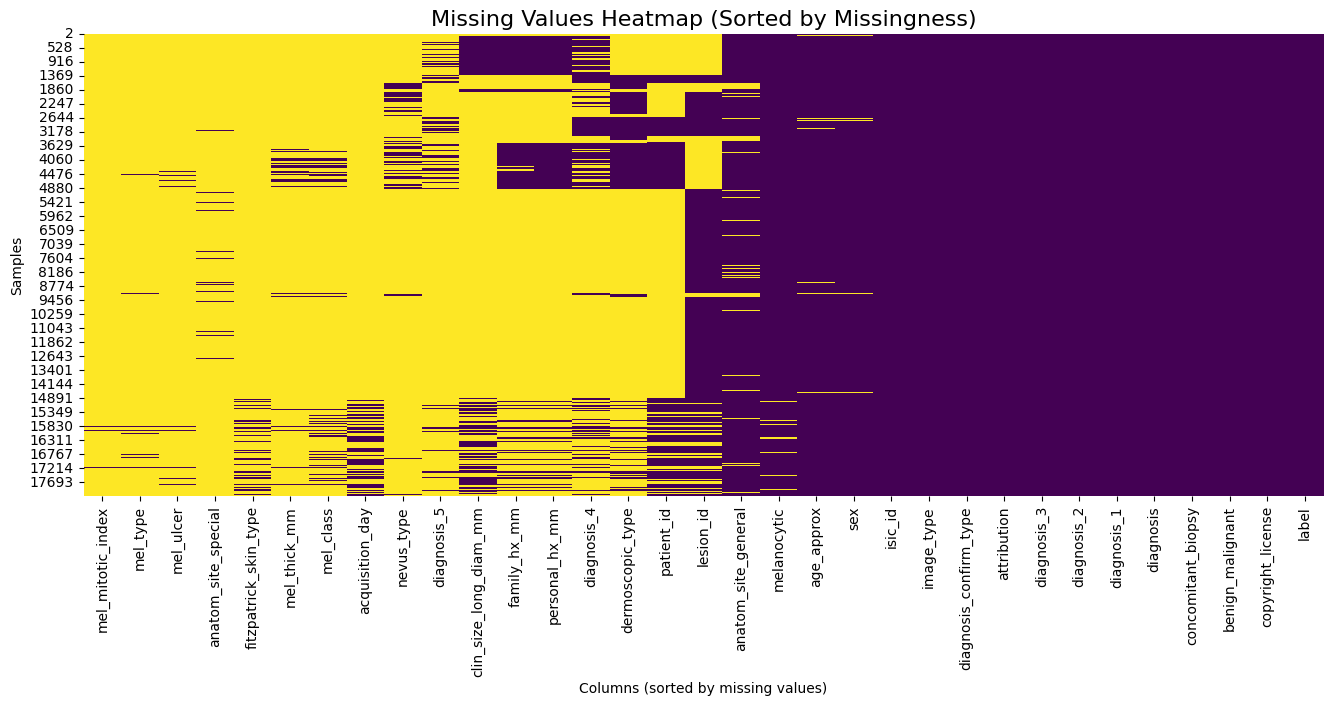

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort columns by missing values (descending)
missing_order = df.isnull().sum().sort_values(ascending=False).index

plt.figure(figsize=(16, 6))
sns.heatmap(df[missing_order].isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap (Sorted by Missingness)", fontsize=16)
plt.xlabel("Columns (sorted by missing values)")
plt.ylabel("Samples")
plt.show()


**Numeric columns correlation**

    Use Pearson correlation for linear relation, or Spearman for rank-based.

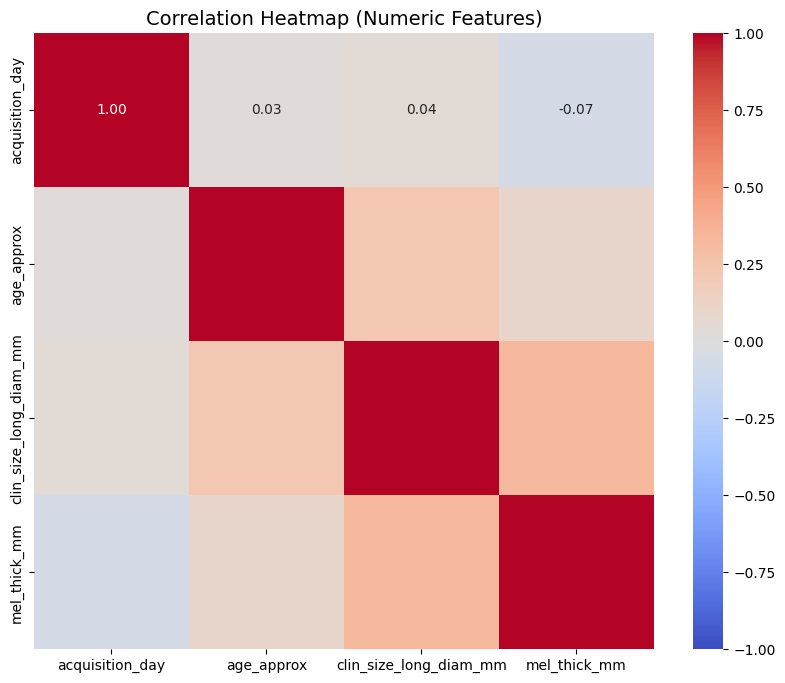

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Numeric subset
num_df = df.select_dtypes(include=['float64','int64'])

# Correlation
corr = num_df.corr(method='pearson')

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", 
            vmin=-1, vmax=1, cbar=True)
plt.title("Correlation Heatmap (Numeric Features)", fontsize=14)
plt.show()


Mixed Data Heatmap (using phik)

    categorical col's too

C:\Users\lenovo\AppData\Roaming\Python\Python311\site-packages\phik\data_quality.py:59: UserWarning: The number of unique values of variable isic_id is large: 12658. Are you sure this is not an interval variable? Analysis for pairs of variables including isic_id can be slow.
  warnings.warn(
C:\Users\lenovo\AppData\Roaming\Python\Python311\site-packages\phik\data_quality.py:59: UserWarning: The number of unique values of variable lesion_id is large: 5408. Are you sure this is not an interval variable? Analysis for pairs of variables including lesion_id can be slow.
  warnings.warn(
C:\Users\lenovo\AppData\Roaming\Python\Python311\site-packages\phik\data_quality.py:59: UserWarning: The number of unique values of variable patient_id is large: 1891. Are you sure this is not an interval variable? Analysis for pairs of variables including patient_id can be slow.
  warnings.warn(
C:\Users\lenovo\AppData\Roaming\Python\Python311\site-packages\phik\data_quality.py:82: UserWarning: Not enough u

<Figure size 1200x1000 with 0 Axes>

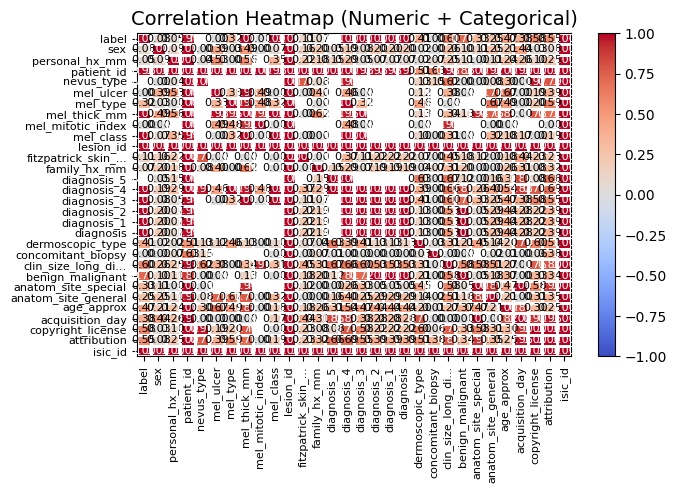

In [36]:
# from phik.report import plot_correlation_matrix

# phik_matrix = df.phik_matrix(interval_cols=[])

# plt.figure(figsize=(12,10))
# plot_correlation_matrix(phik_matrix.values, 
#                         x_labels=phik_matrix.columns, 
#                         y_labels=phik_matrix.index, 
#                         vmin=-1, vmax=1, 
#                         color_map="coolwarm", 
#                         fontsize_factor=0.8)
# plt.title("Correlation Heatmap (Numeric + Categorical)", fontsize=14)
# plt.show()


## Drop the col's having missing values greater than 25 %

In [32]:
# Calculate missing percentage
missing_percentage = df.isnull().mean() * 100  

df.drop(columns=missing_percentage[missing_percentage > 25].index)

,isic_id,attribution,copyright_license,age_approx,anatom_site_general,benign_malignant,concomitant_biopsy,diagnosis,diagnosis_1,diagnosis_2,diagnosis_3,diagnosis_confirm_type,image_type,melanocytic,sex,label
2,ISIC_0000013,Anonymous,CC-0,30.0,posterior torso,malignant,True,melanoma,Malignant,Malignant melanocytic proliferations (Melanoma),Melanoma Invasive,histopathology,dermoscopic,True,female,melanoma_invasive
3,ISIC_0000022,Anonymous,CC-0,55.0,lower extremity,malignant,True,melanoma,Malignant,Malignant melanocytic proliferations (Melanoma),Melanoma in situ,histopathology,dermoscopic,True,female,melanoma_in_situ
4,ISIC_0000026,Anonymous,CC-0,30.0,lower extremity,malignant,True,melanoma,Malignant,Malignant melanocytic proliferations (Melanoma),Melanoma Invasive,histopathology,dermoscopic,True,female,melanoma_invasive
6,ISIC_0000030,Anonymous,CC-0,55.0,lower extremity,malignant,True,melanoma,Malignant,Malignant melanocytic proliferations (Melanoma),Melanoma Invasive,histopathology,dermoscopic,True,female,melanoma_invasive
7,ISIC_0000031,Anonymous,CC-0,70.0,upper extremity,malignant,True,melanoma,Malignant,Malignant melanocytic proliferations (Melanoma),Melanoma Invasive,histopathology,dermoscopic,True,male,melanoma_invasive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18126,ISIC_9965174,Memorial Sloan Kettering Cancer Center,CC-BY,30.0,anterior torso,benign,True,nevus,Benign,Benign melanocytic proliferations,Nevus,histopathology,dermoscopic,True,female,nevus
18128,ISIC_9975949,Memorial Sloan Kettering Cancer Center,CC-BY,40.0,NaN,benign,True,nevus,Benign,Benign melanocytic proliferations,Nevus,histopathology,dermoscopic,True,male,nevus
18129,ISIC_9977219,"ViDIR Group, Department of Dermatology, Medica...",CC-BY-NC,60.0,NaN,benign,True,nevus,Benign,Benign melanocytic proliferations,Nevus,histopathology,dermoscopic,True,male,nevus
18131,ISIC_9997614,Memorial Sloan Kettering Cancer Center,CC-BY,50.0,upper extremity,benign,True,nevus,Benign,Benign melanocytic proliferations,Nevus,histopathology,dermoscopic,True,female,nevus


In [28]:
# Calculate missing percentage
missing_percentage = df.isnull().mean() * 100  

# Drop columns with >25% missing values
df_reduced = df.drop(columns=missing_percentage[missing_percentage > 25].index)

print("Shape before:", df.shape)
print("Shape after:", df_reduced.shape)

# If you also want to see which columns got dropped
dropped_cols = missing_percentage[missing_percentage > 25].index.tolist()
print("Dropped columns:", dropped_cols)


Shape before: (12658, 33)
Shape after: (12658, 16)
Dropped columns: ['acquisition_day', 'anatom_site_special', 'clin_size_long_diam_mm', 'dermoscopic_type', 'diagnosis_4', 'diagnosis_5', 'family_hx_mm', 'fitzpatrick_skin_type', 'lesion_id', 'mel_class', 'mel_mitotic_index', 'mel_thick_mm', 'mel_type', 'mel_ulcer', 'nevus_type', 'patient_id', 'personal_hx_mm']


In [33]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12658 entries, 2 to 18132
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   isic_id                 12658 non-null  object 
 1   attribution             12658 non-null  object 
 2   copyright_license       12658 non-null  object 
 3   age_approx              12457 non-null  float64
 4   anatom_site_general     11808 non-null  object 
 5   benign_malignant        12658 non-null  object 
 6   concomitant_biopsy      12658 non-null  bool   
 7   diagnosis               12658 non-null  object 
 8   diagnosis_1             12658 non-null  object 
 9   diagnosis_2             12658 non-null  object 
 10  diagnosis_3             12658 non-null  object 
 11  diagnosis_confirm_type  12658 non-null  object 
 12  image_type              12658 non-null  object 
 13  melanocytic             12409 non-null  object 
 14  sex                     12512 non-null  obj

In [34]:
# df_reduced.describe()

# Missing values count and percentage
missing_counts = df_reduced.isnull().sum()
missing_percent = (missing_counts / len(df_reduced)) * 100

# Combine into one DataFrame
missing_df = pd.DataFrame({
    'Missing Values': missing_counts,
    'Percentage': missing_percent.round(2)
}).sort_values(by='Missing Values', ascending=False)

print(missing_df)

                        Missing Values  Percentage
anatom_site_general                850        6.72
melanocytic                        249        1.97
age_approx                         201        1.59
sex                                146        1.15
isic_id                              0        0.00
attribution                          0        0.00
copyright_license                    0        0.00
benign_malignant                     0        0.00
concomitant_biopsy                   0        0.00
diagnosis                            0        0.00
diagnosis_1                          0        0.00
diagnosis_2                          0        0.00
diagnosis_3                          0        0.00
diagnosis_confirm_type               0        0.00
image_type                           0        0.00
label                                0        0.00


## Now drop the irrelevant cols


In [37]:
df_reduced['label'].value_counts()

label
nevus                10826
melanoma_in_situ      1035
melanoma_invasive      797
Name: count, dtype: int64

In [39]:
# GOLD_DF = df_reduced

In [41]:
df_reduced.columns

Index(['isic_id', 'attribution', 'copyright_license', 'age_approx',
       'anatom_site_general', 'benign_malignant', 'concomitant_biopsy',
       'diagnosis', 'diagnosis_1', 'diagnosis_2', 'diagnosis_3',
       'diagnosis_confirm_type', 'image_type', 'melanocytic', 'sex', 'label'],
      dtype='object')

In [76]:
#  `concomitant_biopsy` --> KEEP (but use cautiously)

print(df_reduced['concomitant_biopsy'].unique())

[ True False]


In [66]:
print(df_reduced['diagnosis'].unique())

['melanoma' 'nevus']


In [67]:
print(df_reduced['diagnosis_1'].unique())

['Malignant' 'Benign']


In [68]:
print(df_reduced['diagnosis_2'].unique())

['Malignant melanocytic proliferations (Melanoma)'
 'Benign melanocytic proliferations']


In [69]:
print(df_reduced['diagnosis_3'].unique())

['Melanoma Invasive' 'Melanoma in situ' 'Nevus']


In [71]:
print(df_reduced['diagnosis_confirm_type'].unique())

['histopathology']


In [72]:
print(df_reduced['image_type'].unique())

['dermoscopic']


In [73]:
print(df_reduced['melanocytic'].unique())

[True nan]


In [74]:
print(df_reduced['sex'].unique())

['female' 'male' nan]


In [75]:
print(df_reduced['label'].unique())

['melanoma_invasive' 'melanoma_in_situ' 'nevus']


In [58]:
print(df_reduced['attribution'].unique())

['Anonymous' 'Department of Dermatology, Medical University of Vienna'
 'ViDIR Group, Department of Dermatology, Medical University of Vienna'
 'Memorial Sloan Kettering Cancer Center' 'Hospital Clínic de Barcelona'
 'Hospital Italiano de Buenos Aires'
 'Sydney Melanoma Diagnostic Center at Royal Prince Alfred Hospital'
 'The University of Queensland Diamantina Institute, The University of Queensland, Dermatology Research Centre'
 'Sydney Melanoma Diagnostic Center at Royal Prince Alfred Hospital, Pascale Guitera']


In [59]:
print(df_reduced['copyright_license'].unique())

['CC-0' 'CC-BY-NC' 'CC-BY']


In [61]:
print(df_reduced['age_approx'].unique())

[30. 55. 70. 25. 65. 35. 60. 80. 85. 50. 75. 45. 40. nan 20. 15. 10.  5.]


In [63]:
print(df_reduced['anatom_site_general'].unique())

['posterior torso' 'lower extremity' 'upper extremity' 'anterior torso'
 'head/neck' nan 'palms/soles' 'lateral torso' 'oral/genital']


In [64]:
print(df_reduced['benign_malignant'].unique())

['malignant' 'benign' 'indeterminate/benign' 'indeterminate'
 'indeterminate/malignant']


## what strategy should we use to drop the cols and keep the most imprtant cols only

drop these col's : 
    
* copyright_license
* benign_malignant
* diagnosis, diagnosis_1, diagnosis_2, diagnosis_3 (bcz we have label col for classification)
* diagnosis_confirm_type
* image_type
* melanocytic

In [77]:
drop_cols = [
    'copyright_license',
    'benign_malignant',
    'diagnosis', 'diagnosis_1', 'diagnosis_2', 'diagnosis_3',
    'diagnosis_confirm_type',
    'image_type',
    'melanocytic'
]

df_meta = df.drop(columns=drop_cols, errors='ignore')
df_meta

,isic_id,attribution,age_approx,anatom_site_general,concomitant_biopsy,sex,label
2,ISIC_0000013,Anonymous,30.0,posterior torso,True,female,melanoma_invasive
3,ISIC_0000022,Anonymous,55.0,lower extremity,True,female,melanoma_in_situ
4,ISIC_0000026,Anonymous,30.0,lower extremity,True,female,melanoma_invasive
6,ISIC_0000030,Anonymous,55.0,lower extremity,True,female,melanoma_invasive
7,ISIC_0000031,Anonymous,70.0,upper extremity,True,male,melanoma_invasive
...,...,...,...,...,...,...,...
18126,ISIC_9965174,Memorial Sloan Kettering Cancer Center,30.0,anterior torso,True,female,nevus
18128,ISIC_9975949,Memorial Sloan Kettering Cancer Center,40.0,NaN,True,male,nevus
18129,ISIC_9977219,"ViDIR Group, Department of Dermatology, Medica...",60.0,NaN,True,male,nevus
18131,ISIC_9997614,Memorial Sloan Kettering Cancer Center,50.0,upper extremity,True,female,nevus


In [88]:
df_meta = df_meta.drop(columns='attribution')

In [89]:
df = df_meta

In [91]:
df_meta

,isic_id,age_approx,anatom_site_general,concomitant_biopsy,sex,label
2,ISIC_0000013,30.0,posterior torso,True,female,melanoma_invasive
3,ISIC_0000022,55.0,lower extremity,True,female,melanoma_in_situ
4,ISIC_0000026,30.0,lower extremity,True,female,melanoma_invasive
6,ISIC_0000030,55.0,lower extremity,True,female,melanoma_invasive
7,ISIC_0000031,70.0,upper extremity,True,male,melanoma_invasive
...,...,...,...,...,...,...
18126,ISIC_9965174,30.0,anterior torso,True,female,nevus
18128,ISIC_9975949,40.0,NaN,True,male,nevus
18129,ISIC_9977219,60.0,NaN,True,male,nevus
18131,ISIC_9997614,50.0,upper extremity,True,female,nevus


In [92]:
GOLD_DF = df_meta

In [98]:
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12658 entries, 2 to 18132
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   isic_id              12658 non-null  object 
 1   age_approx           12457 non-null  float64
 2   anatom_site_general  11808 non-null  object 
 3   concomitant_biopsy   12658 non-null  bool   
 4   sex                  12512 non-null  object 
 5   label                12658 non-null  object 
dtypes: bool(1), float64(1), object(4)
memory usage: 605.7+ KB


In [100]:
df_meta.isnull().sum()

isic_id                  0
age_approx             201
anatom_site_general    850
concomitant_biopsy       0
sex                    146
label                    0
dtype: int64

In [97]:
df_meta['label'].value_counts()

label
nevus                10826
melanoma_in_situ      1035
melanoma_invasive      797
Name: count, dtype: int64

In [96]:
df_meta['sex'].value_counts()

sex
male      6281
female    6231
Name: count, dtype: int64

In [95]:
df_meta['concomitant_biopsy'].value_counts()

concomitant_biopsy
True     12632
False       26
Name: count, dtype: int64

In [94]:
df_meta['anatom_site_general'].value_counts()

anatom_site_general
anterior torso     3111
posterior torso    2767
lower extremity    2642
upper extremity    1828
head/neck          1160
lateral torso       142
palms/soles         129
oral/genital         29
Name: count, dtype: int64

In [93]:
df_meta['age_approx'].value_counts()

age_approx
40.0    1354
45.0    1319
35.0    1205
50.0    1192
55.0    1078
30.0    1021
60.0     992
65.0     925
70.0     745
25.0     644
75.0     605
20.0     368
80.0     357
85.0     306
15.0     183
10.0     113
5.0       50
Name: count, dtype: int64

In [102]:
df_meta

,isic_id,age_approx,anatom_site_general,concomitant_biopsy,sex,label
2,ISIC_0000013,30.0,posterior torso,True,female,melanoma_invasive
3,ISIC_0000022,55.0,lower extremity,True,female,melanoma_in_situ
4,ISIC_0000026,30.0,lower extremity,True,female,melanoma_invasive
6,ISIC_0000030,55.0,lower extremity,True,female,melanoma_invasive
7,ISIC_0000031,70.0,upper extremity,True,male,melanoma_invasive
...,...,...,...,...,...,...
18126,ISIC_9965174,30.0,anterior torso,True,female,nevus
18128,ISIC_9975949,40.0,NaN,True,male,nevus
18129,ISIC_9977219,60.0,NaN,True,male,nevus
18131,ISIC_9997614,50.0,upper extremity,True,female,nevus


#### drop the missing rows/entries that belong to in situ & Nevus class in `sex` col

In [103]:

# # work on a copy so original is preserved
# df0 = df_meta.copy()

# # diagnostics before
# print("Total rows (before):", len(df0))
# print("Missing 'sex' (before):", df0['sex'].isna().sum())
# print("Missing 'sex' by label (before):")
# print(df0[df0['sex'].isna()]['label'].value_counts(), "\n")

# # show class counts before (for transparency)
# print("Class counts (before):")
# print(df0['label'].value_counts(), "\n")

# # labels for which we WILL drop missing-sex rows
# drop_labels = ['nevus', 'melanoma_in_situ']

# # boolean mask for rows to drop
# mask_drop = df0['sex'].isna() & df0['label'].isin(drop_labels)
# n_to_drop = mask_drop.sum()
# print("Rows that will be dropped (sex is missing AND label in {}): {}".format(drop_labels, n_to_drop))

# # perform drop
# df1 = df0.drop(index=df0[mask_drop].index).copy()

# # diagnostics after drop
# print("\nTotal rows (after drop):", len(df1))
# print("Missing 'sex' (after drop):", df1['sex'].isna().sum())
# print("Missing 'sex' by label (after drop):")
# print(df1[df1['sex'].isna()]['label'].value_counts(), "\n")

# print("Class counts (after):")
# print(df1['label'].value_counts(), "\n")


Total rows (before): 12658
Missing 'sex' (before): 146
Missing 'sex' by label (before):
label
nevus                121
melanoma_invasive     23
melanoma_in_situ       2
Name: count, dtype: int64 

Class counts (before):
label
nevus                10826
melanoma_in_situ      1035
melanoma_invasive      797
Name: count, dtype: int64 

Rows that will be dropped (sex is missing AND label in ['nevus', 'melanoma_in_situ']): 123

Total rows (after drop): 12535
Missing 'sex' (after drop): 23
Missing 'sex' by label (after drop):
label
melanoma_invasive    23
Name: count, dtype: int64 

Class counts (after):
label
nevus                10705
melanoma_in_situ      1033
melanoma_invasive      797
Name: count, dtype: int64 



In [107]:
df = df1

In [108]:
GOLD_DF = df1

**Random assignment/filling according to distribution for `sex` col**

In [109]:
import numpy as np

# Get invasive distribution
invasive_dist = df1[df1['label'] == 'melanoma_invasive']['sex'].value_counts(normalize=True)
print(invasive_dist)

# Sample for missing invasive rows
mask = (df1['label'] == 'melanoma_invasive') & (df1['sex'].isnull())
n_missing = mask.sum()

df1.loc[mask, 'sex'] = np.random.choice(
    invasive_dist.index, 
    size=n_missing, 
    p=invasive_dist.values
)


sex
male      0.680879
female    0.319121
Name: proportion, dtype: float64


In [111]:
df1.isnull().sum()

isic_id                  0
age_approx              87
anatom_site_general    799
concomitant_biopsy       0
sex                      0
label                    0
dtype: int64

In [114]:
df1['anatom_site_general'].value_counts()

anatom_site_general
anterior torso     3080
posterior torso    2746
lower extremity    2632
upper extremity    1822
head/neck          1160
lateral torso       138
palms/soles         129
oral/genital         29
Name: count, dtype: int64

#### drop the missing rows/entries that belong to in situ & Nevus class in `sex` col

In [115]:
# # work on copy
# df2 = df1.copy()

# # diagnostics before
# print("Total rows (before):", len(df2))
# print("Missing 'anatom_site_general' (before):", df2['anatom_site_general'].isna().sum())
# print("Missing by label (before):")
# print(df2[df2['anatom_site_general'].isna()]['label'].value_counts(), "\n")

# # labels for which we WILL drop missing anatom_site_general rows
# drop_labels = ['nevus', 'melanoma_in_situ']

# # boolean mask for rows to drop
# mask_drop = df2['anatom_site_general'].isna() & df2['label'].isin(drop_labels)
# n_to_drop = mask_drop.sum()
# print("Rows that will be dropped (missing anatom_site_general AND label in {}): {}".format(drop_labels, n_to_drop))

# # perform drop
# df2 = df2.drop(index=df2[mask_drop].index).copy()

# # diagnostics after drop
# print("\nTotal rows (after drop):", len(df2))
# print("Missing 'anatom_site_general' (after drop):", df2['anatom_site_general'].isna().sum())
# print("Missing by label (after drop):")
# print(df2[df2['anatom_site_general'].isna()]['label'].value_counts(), "\n")

# print("Class counts (after):")
# print(df2['label'].value_counts(), "\n")


Total rows (before): 12535
Missing 'anatom_site_general' (before): 799
Missing by label (before):
label
nevus                667
melanoma_invasive     82
melanoma_in_situ      50
Name: count, dtype: int64 

Rows that will be dropped (missing anatom_site_general AND label in ['nevus', 'melanoma_in_situ']): 717

Total rows (after drop): 11818
Missing 'anatom_site_general' (after drop): 82
Missing by label (after drop):
label
melanoma_invasive    82
Name: count, dtype: int64 

Class counts (after):
label
nevus                10038
melanoma_in_situ       983
melanoma_invasive      797
Name: count, dtype: int64 



In [120]:
df2

,isic_id,age_approx,anatom_site_general,concomitant_biopsy,sex,label
2,ISIC_0000013,30.0,posterior torso,True,female,melanoma_invasive
3,ISIC_0000022,55.0,lower extremity,True,female,melanoma_in_situ
4,ISIC_0000026,30.0,lower extremity,True,female,melanoma_invasive
6,ISIC_0000030,55.0,lower extremity,True,female,melanoma_invasive
7,ISIC_0000031,70.0,upper extremity,True,male,melanoma_invasive
...,...,...,...,...,...,...
18122,ISIC_9961567,65.0,anterior torso,True,male,nevus
18124,ISIC_9963174,35.0,anterior torso,True,female,nevus
18126,ISIC_9965174,30.0,anterior torso,True,female,nevus
18131,ISIC_9997614,50.0,upper extremity,True,female,nevus


**Random assignment/filling according to distribution for `anatom_site_general` col**

In [119]:
GOLD_DF = df2
df = df2

In [117]:
# Step 1: Get distribution of anatom_site_general for melanoma_invasive (non-missing only)
dist = df2.loc[
    (df2['label'] == 'melanoma_invasive') & (df2['anatom_site_general'].notna()),
    'anatom_site_general'
].value_counts(normalize=True)

print("Distribution of invasive (non-missing):")
print(dist)

Distribution of invasive (non-missing):
anatom_site_general
upper extremity    0.267133
lower extremity    0.258741
posterior torso    0.247552
head/neck          0.124476
anterior torso     0.096503
lateral torso      0.005594
Name: proportion, dtype: float64


In [121]:
# Step 2: Find missing invasive indices
missing_idx = df2.loc[
    (df1['label'] == 'melanoma_invasive') & (df2['anatom_site_general'].isna())].index

# Step 3: Randomly sample anatom_site_general for those missing based on distribution
imputed_values = np.random.choice(
    dist.index, 
    size=len(missing_idx), 
    p=dist.values
)

# Step 4: Fill them in the dataframe
df2.loc[missing_idx, 'anatom_site_general'] = imputed_values

# ✅ Done
print("Missing after imputation:", df2['anatom_site_general'].isna().sum())

print("Class distribution after imputation:")
print()
print(df2.loc[df2['label'] == 'melanoma_invasive', 'anatom_site_general'].value_counts(normalize=True))

Missing after imputation: 0
Class distribution after imputation:

anatom_site_general
lower extremity    0.265997
upper extremity    0.260979
posterior torso    0.242158
head/neck          0.129235
anterior torso     0.095358
lateral torso      0.006274
Name: proportion, dtype: float64


In [127]:
GOLD_DF = df2
df = df2

In [128]:
df.isnull().sum()

isic_id                 0
age_approx             85
anatom_site_general     0
concomitant_biopsy      0
sex                     0
label                   0
dtype: int64

In [130]:
# Inspect the rows where age_approx is missing
missing_age_rows = df[df['age_approx'].isna()]
print(missing_age_rows[['isic_id', 'label']].head(20))
print("Unique labels for missing age_approx:", missing_age_rows['label'].unique())


           isic_id              label
133   ISIC_0000469  melanoma_invasive
136   ISIC_0000487  melanoma_invasive
140   ISIC_0000516  melanoma_invasive
141   ISIC_0000517  melanoma_invasive
142   ISIC_0000518  melanoma_invasive
143   ISIC_0000519  melanoma_invasive
144   ISIC_0000520  melanoma_invasive
145   ISIC_0000521  melanoma_invasive
146   ISIC_0000522  melanoma_invasive
147   ISIC_0000526  melanoma_invasive
2627  ISIC_0014691              nevus
2634  ISIC_0014698              nevus
2640  ISIC_0014707              nevus
2671  ISIC_0014753              nevus
2690  ISIC_0014779              nevus
2701  ISIC_0014792              nevus
2704  ISIC_0014796              nevus
2708  ISIC_0014802              nevus
2731  ISIC_0014834              nevus
2743  ISIC_0014851              nevus
Unique labels for missing age_approx: ['melanoma_invasive' 'nevus']


In [131]:
missing_age = df[df['age_approx'].isna()]['label'].value_counts()
print("Missing 'age_approx' counts by class:")
print(missing_age)


Missing 'age_approx' counts by class:
label
nevus                62
melanoma_invasive    23
Name: count, dtype: int64


In [132]:
# Work on copy
df3 = df.copy()

# Drop missing ages for nevus
mask_nevus = (df3['label'] == 'nevus') & (df3['age_approx'].isna())
df3 = df3.drop(index=df3[mask_nevus].index)

# For invasive, impute with distribution (mean/median, or random sampling)
invasive_nonmissing = df3.loc[
    (df3['label'] == 'melanoma_invasive') & df3['age_approx'].notna(),
    'age_approx'
]

# Fill invasive missing with random choice from observed invasive ages
mask_invasive = (df3['label'] == 'melanoma_invasive') & (df3['age_approx'].isna())
df3.loc[mask_invasive, 'age_approx'] = np.random.choice(invasive_nonmissing, size=mask_invasive.sum())

# Check results
print("Missing after handling:\n", df3.isnull().sum())
print("Class counts:\n", df3['label'].value_counts())


Missing after handling:
 isic_id                0
age_approx             0
anatom_site_general    0
concomitant_biopsy     0
sex                    0
label                  0
dtype: int64
Class counts:
 label
nevus                9976
melanoma_in_situ      983
melanoma_invasive     797
Name: count, dtype: int64


In [135]:
df3.isnull().sum()

isic_id                0
age_approx             0
anatom_site_general    0
concomitant_biopsy     0
sex                    0
label                  0
dtype: int64

## Cleaned data frame `df3` saved it in `GOLD_DF`

In [137]:
# GOLD_DF = df3
# df = df3
# GOLD_DF = df

In [142]:
df = df.drop(columns='concomitant_biopsy')
df

,isic_id,age_approx,anatom_site_general,sex,label
2,ISIC_0000013,30.0,posterior torso,female,melanoma_invasive
3,ISIC_0000022,55.0,lower extremity,female,melanoma_in_situ
4,ISIC_0000026,30.0,lower extremity,female,melanoma_invasive
6,ISIC_0000030,55.0,lower extremity,female,melanoma_invasive
7,ISIC_0000031,70.0,upper extremity,male,melanoma_invasive
...,...,...,...,...,...
18122,ISIC_9961567,65.0,anterior torso,male,nevus
18124,ISIC_9963174,35.0,anterior torso,female,nevus
18126,ISIC_9965174,30.0,anterior torso,female,nevus
18131,ISIC_9997614,50.0,upper extremity,female,nevus


In [144]:
GOLD_DF = df

In [145]:
df.isnull().sum()

isic_id                0
age_approx             0
anatom_site_general    0
sex                    0
label                  0
dtype: int64

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11756 entries, 2 to 18132
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   isic_id              11756 non-null  object 
 1   age_approx           11756 non-null  float64
 2   anatom_site_general  11756 non-null  object 
 3   sex                  11756 non-null  object 
 4   label                11756 non-null  object 
dtypes: float64(1), object(4)
memory usage: 551.1+ KB


In [148]:
GOLD_DF.isnull().sum()

isic_id                0
age_approx             0
anatom_site_general    0
sex                    0
label                  0
dtype: int64

In [149]:
GOLD_DF

,isic_id,age_approx,anatom_site_general,sex,label
2,ISIC_0000013,30.0,posterior torso,female,melanoma_invasive
3,ISIC_0000022,55.0,lower extremity,female,melanoma_in_situ
4,ISIC_0000026,30.0,lower extremity,female,melanoma_invasive
6,ISIC_0000030,55.0,lower extremity,female,melanoma_invasive
7,ISIC_0000031,70.0,upper extremity,male,melanoma_invasive
...,...,...,...,...,...
18122,ISIC_9961567,65.0,anterior torso,male,nevus
18124,ISIC_9963174,35.0,anterior torso,female,nevus
18126,ISIC_9965174,30.0,anterior torso,female,nevus
18131,ISIC_9997614,50.0,upper extremity,female,nevus


In [150]:
GOLD_DF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11756 entries, 2 to 18132
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   isic_id              11756 non-null  object 
 1   age_approx           11756 non-null  float64
 2   anatom_site_general  11756 non-null  object 
 3   sex                  11756 non-null  object 
 4   label                11756 non-null  object 
dtypes: float64(1), object(4)
memory usage: 551.1+ KB


In [151]:
GOLD_DF.describe()

,age_approx
count,11756.000000
mean,48.726182
std,17.409790
min,5.000000
25%,35.000000
50%,50.000000
75%,60.000000
max,85.000000


In [153]:
GOLD_DF.duplicated().sum()

0

In [155]:
# # # Save GOLD_DF to CSV without the index column
# # GOLD_DF.to_csv("GOLD_DF.csv", index=False)

# # Or if you want to include the index explicitly
# GOLD_DF.to_csv("GOLD_DF_with_index.csv", index=True)


# Feature Engineering

In [156]:
file = r"C:\Users\lenovo\OneDrive\Desktop\Melanoma Disease Classification\GOLD_DF.csv"

df = pd.read_csv(file)
df.head()

,isic_id,age_approx,anatom_site_general,sex,label
0,ISIC_0000013,30,posterior torso,female,melanoma_invasive
1,ISIC_0000022,55,lower extremity,female,melanoma_in_situ
2,ISIC_0000026,30,lower extremity,female,melanoma_invasive
3,ISIC_0000030,55,lower extremity,female,melanoma_invasive
4,ISIC_0000031,70,upper extremity,male,melanoma_invasive


In [157]:
df.value_counts()

isic_id       age_approx  anatom_site_general  sex     label            
ISIC_0000013  30          posterior torso      female  melanoma_invasive    1
ISIC_0063694  55          anterior torso       male    nevus                1
ISIC_0063719  30          anterior torso       male    nevus                1
ISIC_0063733  50          anterior torso       female  nevus                1
ISIC_0063744  65          lower extremity      female  nevus                1
                                                                           ..
ISIC_0024936  25          anterior torso       male    nevus                1
ISIC_0024937  45          posterior torso      female  nevus                1
ISIC_0024941  40          lower extremity      female  nevus                1
ISIC_0024959  45          anterior torso       male    nevus                1
ISIC_9998682  60          head/neck            male    melanoma_in_situ     1
Name: count, Length: 11756, dtype: int64

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11756 entries, 0 to 11755
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   isic_id              11756 non-null  object
 1   age_approx           11756 non-null  int64 
 2   anatom_site_general  11756 non-null  object
 3   sex                  11756 non-null  object
 4   label                11756 non-null  object
dtypes: int64(1), object(4)
memory usage: 459.3+ KB


### transform categorical into numerical col's

In [160]:
df['sex'].value_counts()

sex
male      5890
female    5866
Name: count, dtype: int64

In [162]:
df['label'].value_counts()

label
nevus                9976
melanoma_in_situ      983
melanoma_invasive     797
Name: count, dtype: int64

In [161]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Binary encoding for sex
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11756 entries, 0 to 11755
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   isic_id              11756 non-null  object
 1   age_approx           11756 non-null  int64 
 2   anatom_site_general  11756 non-null  object
 3   sex                  11756 non-null  int64 
 4   label                11756 non-null  object
dtypes: int64(2), object(3)
memory usage: 459.3+ KB


In [163]:
# Custom label mapping
label_mapping = {
    'nevus': 0,
    'melanoma_in_situ': 1,
    'melanoma_invasive': 2
}

# Apply mapping
df['label'] = df['label'].map(label_mapping)

print(df['label'].value_counts())
print(df.head())


label
0    9976
1     983
2     797
Name: count, dtype: int64
        isic_id  age_approx anatom_site_general  sex  label
0  ISIC_0000013          30     posterior torso    0      2
1  ISIC_0000022          55     lower extremity    0      1
2  ISIC_0000026          30     lower extremity    0      2
3  ISIC_0000030          55     lower extremity    0      2
4  ISIC_0000031          70     upper extremity    1      2


In [166]:
df['label'].value_counts()

label
0    9976
1     983
2     797
Name: count, dtype: int64

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11756 entries, 0 to 11755
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   isic_id              11756 non-null  object
 1   age_approx           11756 non-null  int64 
 2   anatom_site_general  11756 non-null  object
 3   sex                  11756 non-null  int64 
 4   label                11756 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 459.3+ KB


In [167]:
df['anatom_site_general'].value_counts()

anatom_site_general
anterior torso     3075
posterior torso    2751
lower extremity    2645
upper extremity    1824
head/neck          1166
lateral torso       137
palms/soles         129
oral/genital         29
Name: count, dtype: int64

In [168]:
import pandas as pd

# One-hot encode 'anatom_site_general'
df = pd.get_dummies(df, columns=['anatom_site_general'], drop_first=True)

# print(df.head())
print("\nShape after encoding:", df.shape)



Shape after encoding: (11756, 11)


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11756 entries, 0 to 11755
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   isic_id                              11756 non-null  object
 1   age_approx                           11756 non-null  int64 
 2   sex                                  11756 non-null  int64 
 3   label                                11756 non-null  int64 
 4   anatom_site_general_head/neck        11756 non-null  bool  
 5   anatom_site_general_lateral torso    11756 non-null  bool  
 6   anatom_site_general_lower extremity  11756 non-null  bool  
 7   anatom_site_general_oral/genital     11756 non-null  bool  
 8   anatom_site_general_palms/soles      11756 non-null  bool  
 9   anatom_site_general_posterior torso  11756 non-null  bool  
 10  anatom_site_general_upper extremity  11756 non-null  bool  
dtypes: bool(7), int64(3), object(1)
memory us

**A sample of the img path**

    img: "C:\Users\lenovo\OneDrive\Desktop\Melanoma Disease Classification\melanoma & nevus dataset\images\ISIC_0000002.jpg"

In [192]:
len(df.columns)

11

In [171]:
df_eda = df.drop(columns=['isic_id'])


In [173]:
df_eda.describe(include='all')

,age_approx,sex,label,anatom_site_general_head/neck,anatom_site_general_lateral torso,anatom_site_general_lower extremity,anatom_site_general_oral/genital,anatom_site_general_palms/soles,anatom_site_general_posterior torso,anatom_site_general_upper extremity
count,11756.000000,11756.000000,11756.000000,11756,11756,11756,11756,11756,11756,11756
unique,NaN,NaN,NaN,2,2,2,2,2,2,2
top,NaN,NaN,NaN,False,False,False,False,False,False,False
freq,NaN,NaN,NaN,10590,11619,9111,11727,11627,9005,9932
mean,48.726182,0.501021,0.219207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,17.409790,0.500020,0.553870,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,5.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,35.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,50.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,60.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [174]:
print(df_eda['label'].value_counts(normalize=True))

label
0    0.848588
1    0.083617
2    0.067795
Name: proportion, dtype: float64


**Histograms & Distributions**

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


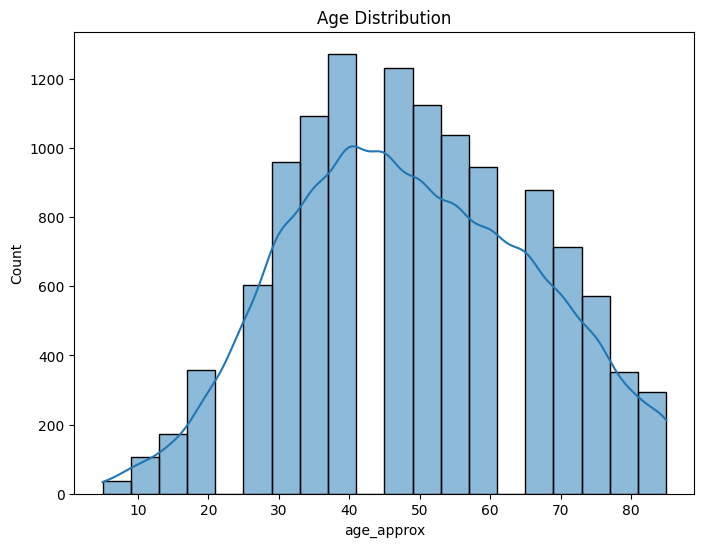

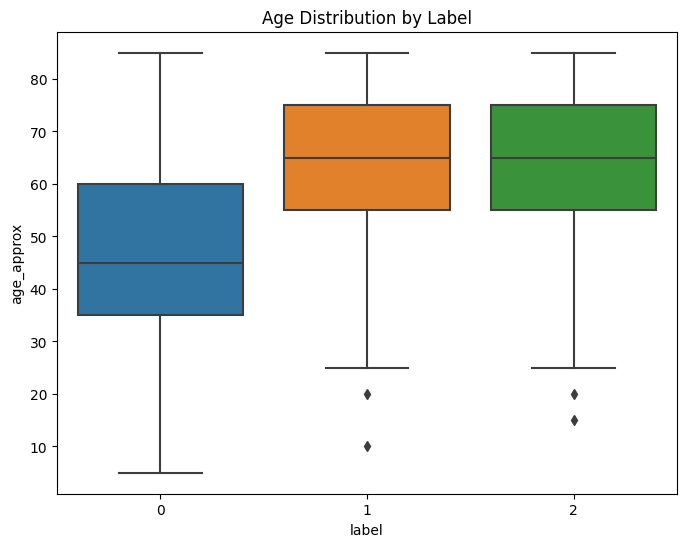

In [176]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.histplot(df_eda['age_approx'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(x='label', y='age_approx', data=df_eda)
plt.title("Age Distribution by Label")
plt.show()


**Categorical Feature Distributions**

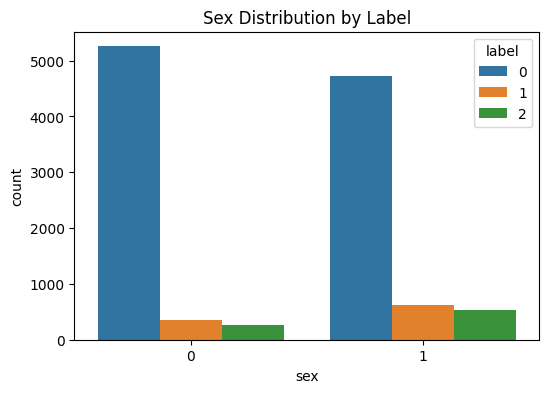

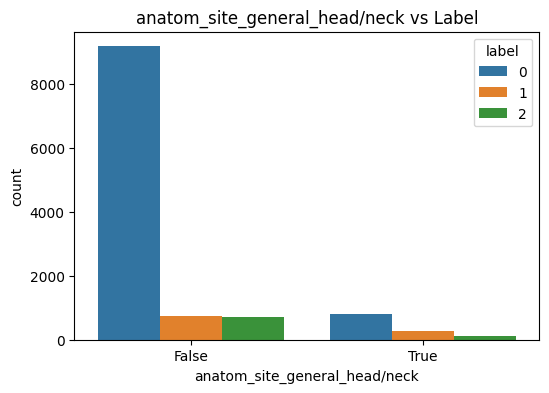

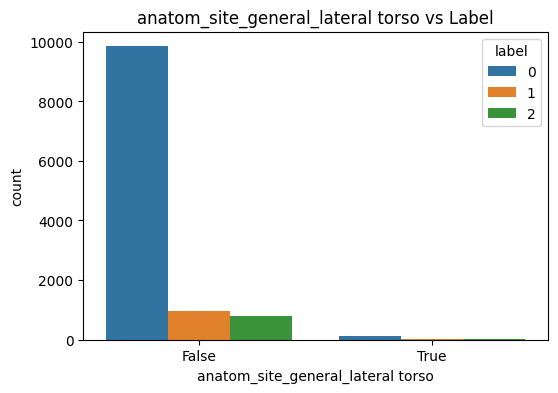

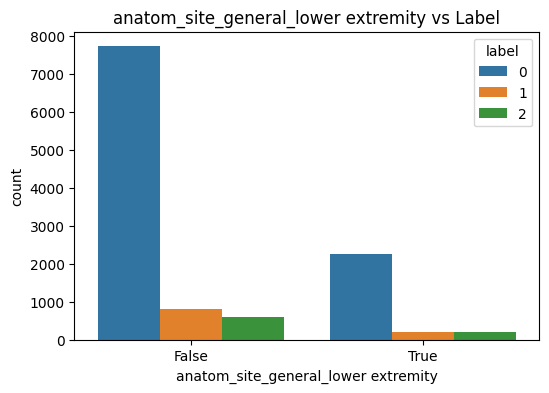

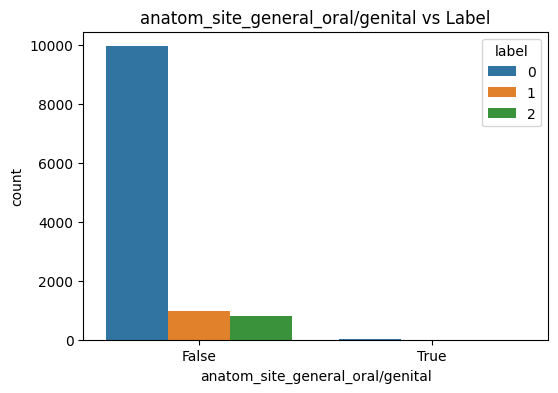

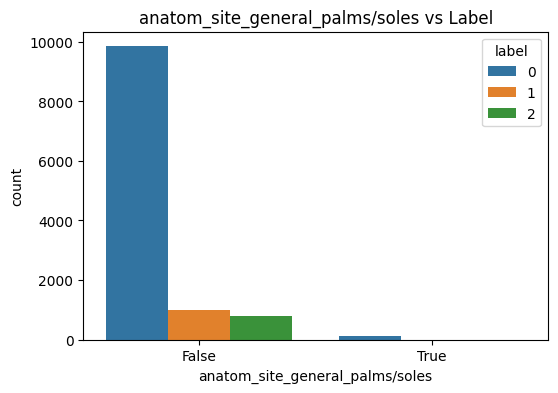

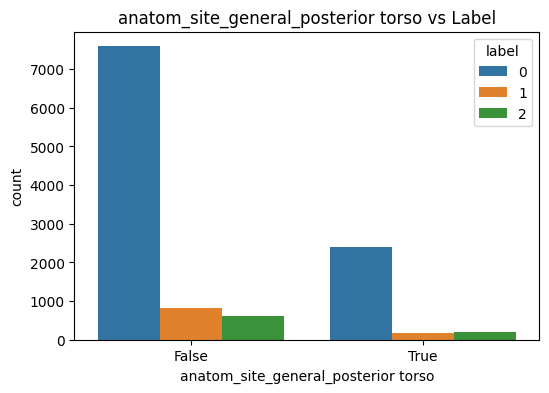

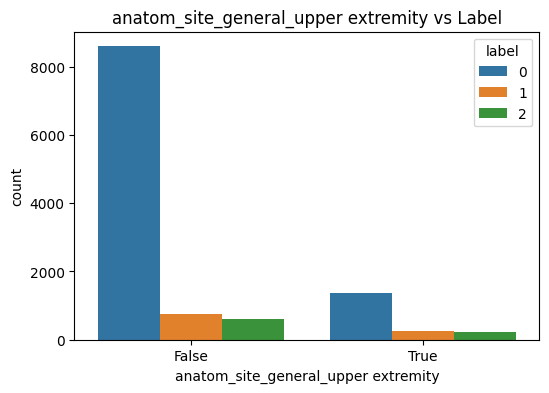

In [177]:
plt.figure(figsize=(6,4))
sns.countplot(x='sex', hue='label', data=df_eda)
plt.title("Sex Distribution by Label")
plt.show()

site_cols = [c for c in df_eda.columns if c.startswith('anatom_site_general')]
for col in site_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='label', data=df_eda)
    plt.title(f"{col} vs Label")
    plt.show()


In [185]:
df_eda = df_eda.drop(columns="age_zscore")

**Correlation Matrix**

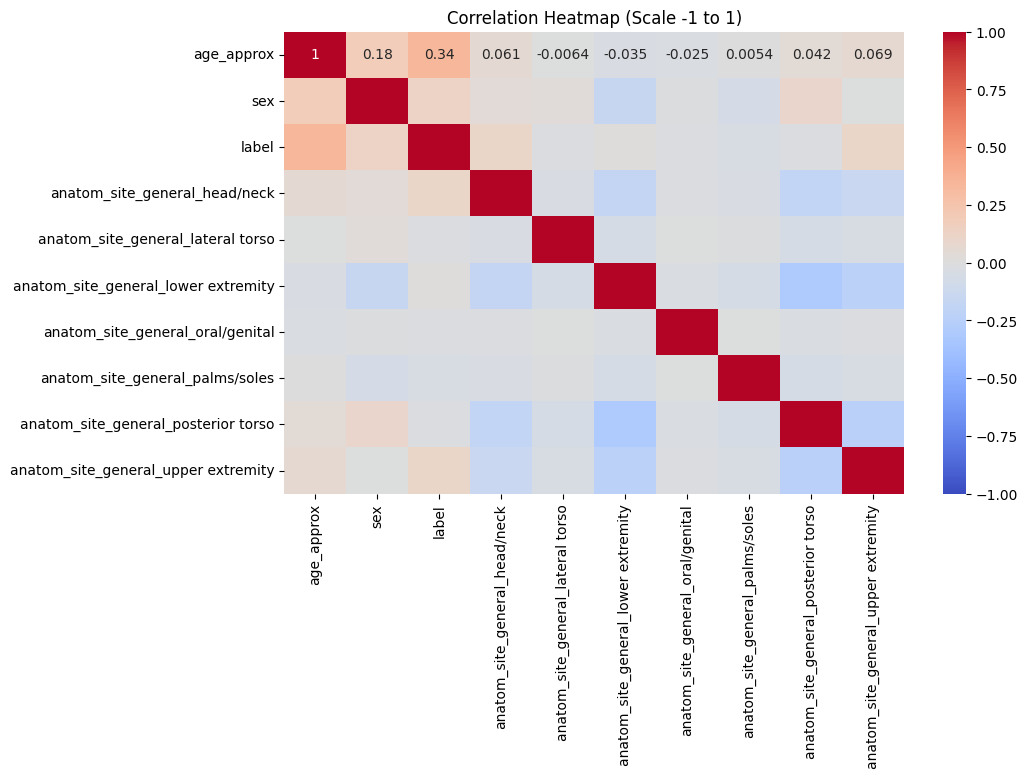

In [186]:
corr = df_eda.corr()

plt.figure(figsize=(10,6))
sns.heatmap(
    corr, 
    annot=True, 
    cmap='coolwarm', 
    vmin=-1, vmax=1,  # fixes the scale from -1 to 1
    center=0          # ensures 0 is white/neutral in colormap
)
plt.title("Correlation Heatmap (Scale -1 to 1)")
plt.show()


**Outlier Detection**

Outliers in Age: 0


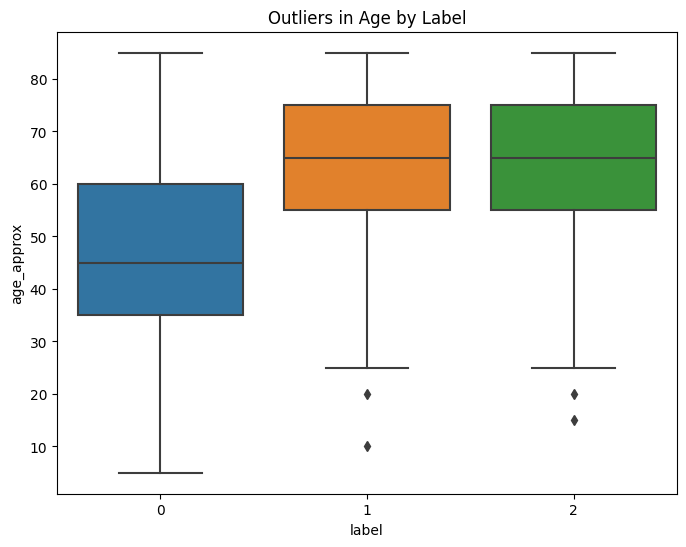

In [179]:
from scipy.stats import zscore

df_eda['age_zscore'] = zscore(df_eda['age_approx'])
outliers = df_eda[df_eda['age_zscore'].abs() > 3]
print("Outliers in Age:", len(outliers))

plt.figure(figsize=(8,6))
sns.boxplot(x='label', y='age_approx', data=df_eda)
plt.title("Outliers in Age by Label")
plt.show()


**Pairplot for Multivariate Analysis**

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. 

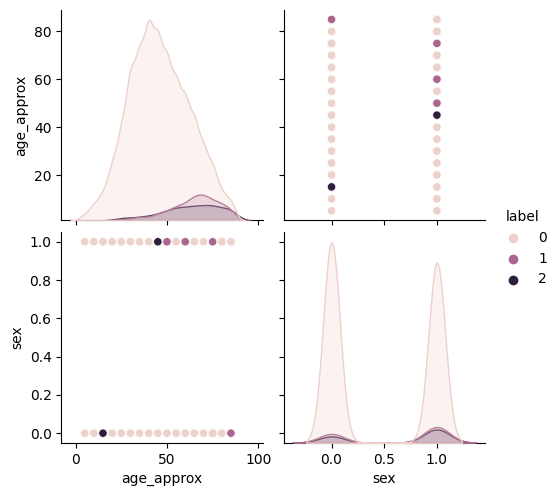

In [180]:
sns.pairplot(df_eda, hue='label', vars=['age_approx','sex'], diag_kind='kde')
plt.show()


**Feature Importance (Quick Check)**

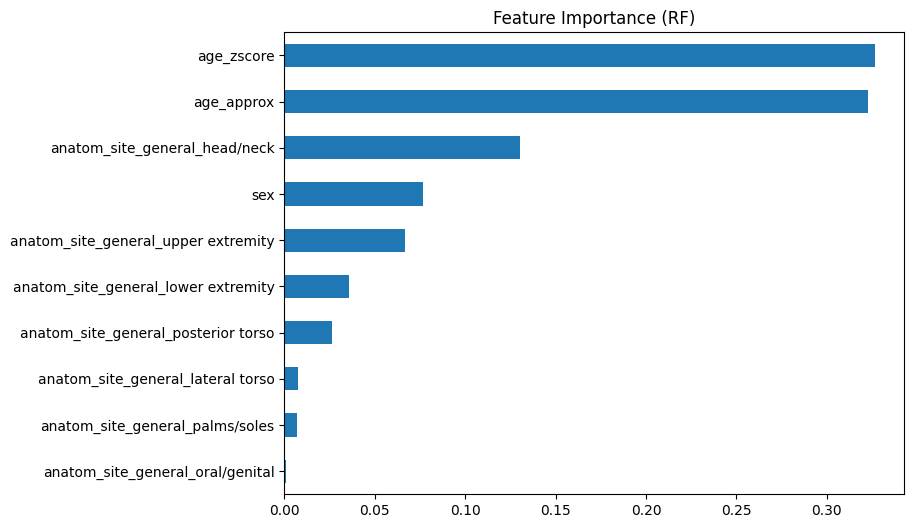

In [181]:
from sklearn.ensemble import RandomForestClassifier

X = df_eda.drop(columns=['label'])
y = df_eda['label']

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

feat_imp = pd.Series(model.feature_importances_, index=X.columns)
feat_imp.sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Feature Importance (RF)")
plt.show()


In [190]:
len(df_eda.columns)

10

In [193]:
# # Save as CSV
# df.to_csv(r"GOLD_DF_02.csv", index=False)

# print("✅ DataFrame saved successfully at GOLD_DF_02.csv")


✅ DataFrame saved successfully at GOLD_DF_02.csv


**Check Class Distribution**


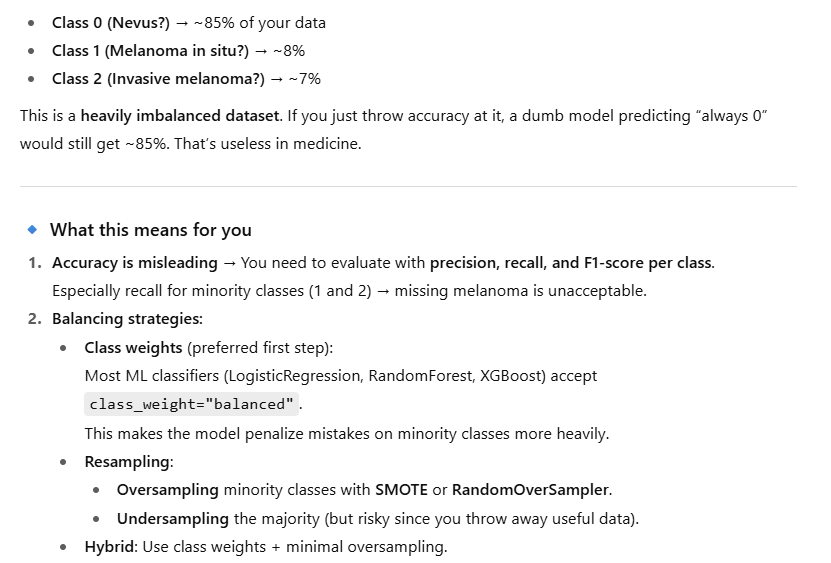

In [200]:
df

,isic_id,age_approx,sex,label,anatom_site_general_head/neck,anatom_site_general_lateral torso,anatom_site_general_lower extremity,anatom_site_general_oral/genital,anatom_site_general_palms/soles,anatom_site_general_posterior torso,anatom_site_general_upper extremity
0,ISIC_0000013,30,0,2,False,False,False,False,False,True,False
1,ISIC_0000022,55,0,1,False,False,True,False,False,False,False
2,ISIC_0000026,30,0,2,False,False,True,False,False,False,False
3,ISIC_0000030,55,0,2,False,False,True,False,False,False,False
4,ISIC_0000031,70,1,2,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
11751,ISIC_9961567,65,1,0,False,False,False,False,False,False,False
11752,ISIC_9963174,35,0,0,False,False,False,False,False,False,False
11753,ISIC_9965174,30,0,0,False,False,False,False,False,False,False
11754,ISIC_9997614,50,0,0,False,False,False,False,False,False,True


In [195]:
df['label'].value_counts(normalize=True)

label
0    0.848588
1    0.083617
2    0.067795
Name: proportion, dtype: float64

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11756 entries, 0 to 11755
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   isic_id                              11756 non-null  object
 1   age_approx                           11756 non-null  int64 
 2   sex                                  11756 non-null  int64 
 3   label                                11756 non-null  int64 
 4   anatom_site_general_head/neck        11756 non-null  bool  
 5   anatom_site_general_lateral torso    11756 non-null  bool  
 6   anatom_site_general_lower extremity  11756 non-null  bool  
 7   anatom_site_general_oral/genital     11756 non-null  bool  
 8   anatom_site_general_palms/soles      11756 non-null  bool  
 9   anatom_site_general_posterior torso  11756 non-null  bool  
 10  anatom_site_general_upper extremity  11756 non-null  bool  
dtypes: bool(7), int64(3), object(1)
memory us

# Training model with Imbalanced Target Class

In [2]:
import pandas as pd
file = r"C:\Users\lenovo\OneDrive\Desktop\Melanoma Disease Classification\GOLD_DF_02.csv"
df = pd.read_csv(file)

In [3]:
from sklearn.model_selection import train_test_split

# Features & labels
X = df.drop('label', axis=1)
y = df['label']

# Step 1: Train+Val (80%) and Test (20%)
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 2: Split Train+Val into Train (70%) and Val (10%)
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.125, random_state=42, stratify=y_trainval
)
# (0.125 of 0.8 = 0.1 of full dataset)

print("Train shape:", X_train.shape, y_train.shape)
print("Validation shape:", X_val.shape, y_val.shape)
print("Test shape:", X_test.shape, y_test.shape)


Train shape: (8228, 10) (8228,)
Validation shape: (1176, 10) (1176,)
Test shape: (2352, 10) (2352,)


**Drop useless columns**

In [4]:
X_train = X_train.drop(columns=['isic_id'])
X_val   = X_val.drop(columns=['isic_id'])
X_test  = X_test.drop(columns=['isic_id'])


In [5]:

print("Train shape:", X_train.shape, y_train.shape)
print("Validation shape:", X_val.shape, y_val.shape)
print("Test shape:", X_test.shape, y_test.shape)


Train shape: (8228, 9) (8228,)
Validation shape: (1176, 9) (1176,)
Test shape: (2352, 9) (2352,)


**Scale numerical features**

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train['age_approx'] = scaler.fit_transform(X_train[['age_approx']])
X_val['age_approx']   = scaler.transform(X_val[['age_approx']])
X_test['age_approx']  = scaler.transform(X_test[['age_approx']])


In [7]:

print("Train shape:", X_train.shape, y_train.shape)
print("Validation shape:", X_val.shape, y_val.shape)
print("Test shape:", X_test.shape, y_test.shape)


Train shape: (8228, 9) (8228,)
Validation shape: (1176, 9) (1176,)
Test shape: (2352, 9) (2352,)


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score, f1_score
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# ============================
# Handle Imbalance (Class Weights)
# ============================
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight="balanced", classes=classes, y=y_train)
class_weights_dict = dict(zip(classes, class_weights))

print("Class Weights:", class_weights_dict)


Class Weights: {0: 0.3928196314332092, 1: 3.9864341085271318, 2: 4.915173237753883}


### Explanation of the above `Imbalanced Class`


* `class_weight="balanced"` in scikit-learn tells the algorithm:

  > “Make sure each class contributes equally to the loss function, regardless of how many samples it has.”

The formula it uses is:

[
w_j = \frac{n_{samples}}{n_{classes} \times n_{samples_in_class_j}}
]

So:

* Class **0** (majority, ~85% of data) → weight ≈ **0.39** (penalized *less* when misclassified).
* Class **1** (~8% of data) → weight ≈ **3.99** (penalized ~10x more than class 0).
* Class **2** (~7% of data) → weight ≈ **4.92** (penalized ~12x more than class 0).



👉 In plain terms:

* If the model misclassifies a **class 2** example, it will be treated as **12 times more serious** than misclassifying a class 0 example.
* This forces the model not to ignore minority classes, which usually happens in imbalanced datasets.



⚖️ **Why important here?**
Without these weights, the model could just predict **class 0 for everything** and get ~85% accuracy — but fail badly on classes 1 and 2.

With weights, Logistic Regression (or any other classifier) *pays more attention to minority classes*, balancing performance.

---
---


## Train Logistic Regression


In [206]:
# ============================
# Train Logistic Regression
# ============================
model = LogisticRegression(max_iter=1000, class_weight=class_weights_dict, random_state=42)
model.fit(X_train, y_train)


LogisticRegression(class_weight={0: 0.3928196314332092, 1: 3.9864341085271318,
                                 2: 4.915173237753883},
                   max_iter=1000, random_state=42)

In [207]:

# ============================
# Evaluate on Validation
# ============================
y_val_pred = model.predict(X_val)

print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

print("\nClassification Report:")
print(classification_report(y_val, y_val_pred, digits=4))

print("Balanced Accuracy:", balanced_accuracy_score(y_val, y_val_pred))
print("Macro F1:", f1_score(y_val, y_val_pred, average='macro'))


Confusion Matrix:
[[706  95 197]
 [ 14  44  40]
 [ 20  17  43]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9541    0.7074    0.8124       998
           1     0.2821    0.4490    0.3465        98
           2     0.1536    0.5375    0.2389        80

    accuracy                         0.6743      1176
   macro avg     0.4632    0.5646    0.4659      1176
weighted avg     0.8436    0.6743    0.7346      1176

Balanced Accuracy: 0.5646314738320178
Macro F1: 0.46592455335104593


In [208]:
# ============================
# Final Evaluation on Test Set
# ============================
y_test_pred = model.predict(X_test)

print("\n>>> Test Set Performance <<<")
print(classification_report(y_test, y_test_pred, digits=4))
print("Balanced Accuracy (Test):", balanced_accuracy_score(y_test, y_test_pred))
print("Macro F1 (Test):", f1_score(y_test, y_test_pred, average='macro'))



>>> Test Set Performance <<<
              precision    recall  f1-score   support

           0     0.9457    0.6899    0.7978      1996
           1     0.2421    0.4264    0.3088       197
           2     0.1566    0.5409    0.2429       159

    accuracy                         0.6577      2352
   macro avg     0.4482    0.5524    0.4499      2352
weighted avg     0.8335    0.6577    0.7193      2352

Balanced Accuracy (Test): 0.5523854005833289
Macro F1 (Test): 0.44985325342371246


## Training on RandomForestClassifier

In [209]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators=200,
    class_weight="balanced",
    random_state=42
)
rf.fit(X_train, y_train)
y_val_pred = rf.predict(X_val)

print(classification_report(y_val, y_val_pred, digits=4))
print("Balanced Accuracy:", balanced_accuracy_score(y_val, y_val_pred))


              precision    recall  f1-score   support

           0     0.9541    0.6663    0.7847       998
           1     0.2301    0.5612    0.3264        98
           2     0.1750    0.5250    0.2625        80

    accuracy                         0.6480      1176
   macro avg     0.4531    0.5842    0.4579      1176
weighted avg     0.8408    0.6480    0.7110      1176

Balanced Accuracy: 0.5841857183755265


### Oversampling with SMOTE (Synthetic Minority Oversampling Technique)

## Use XGboost Model for training

In [9]:
import sklearn, imblearn
print("sklearn:", sklearn.__version__)
print("imblearn:", imblearn.__version__)


sklearn: 1.4.2
imblearn: 0.12.0


In [10]:
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, balanced_accuracy_score, f1_score

# Oversample only on training set
smote = SMOTE(random_state=42)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

print("Original training shape:", X_train.shape, y_train.shape)
print("Oversampled training shape:", X_train_over.shape, y_train_over.shape)

# Train XGBoost
xgb_over = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    random_state=42,
    n_jobs=-1
)
xgb_over.fit(X_train_over, y_train_over)

# Validate
y_val_pred_over = xgb_over.predict(X_val)

print("\n[SMOTE Oversampling] Validation Performance")
print(classification_report(y_val, y_val_pred_over, digits=4))
print("Balanced Accuracy:", balanced_accuracy_score(y_val, y_val_pred_over))
print("Macro F1:", f1_score(y_val, y_val_pred_over, average='macro'))


Original training shape: (8228, 9) (8228,)
Oversampled training shape: (20946, 9) (20946,)

[SMOTE Oversampling] Validation Performance
              precision    recall  f1-score   support

           0     0.9534    0.6964    0.8049       998
           1     0.2358    0.5102    0.3226        98
           2     0.1787    0.5250    0.2667        80

    accuracy                         0.6692      1176
   macro avg     0.4560    0.5772    0.4647      1176
weighted avg     0.8409    0.6692    0.7281      1176

Balanced Accuracy: 0.5771989557345983
Macro F1: 0.46470374590366365
